# Wisconsin Breast Cancer Study
## Dataset
- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

## 1. Read in the data

In [1]:
import pandas as pd
df = pd.read_csv('/Users/jam3jam/Downloads/breast_cancer.csv', sep=",", header=None)

In [3]:
# VERIFY THAT DATASET IS OF PROPER DIMENSION
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Separate the data into feature and target.

In [4]:
# INITIAL FEATURE WRANGLING AND PREPROCESSING
# COLUMN 0 IS NOT RELEVANT, COLUMN 1 IS y, THE REST COMPRISE THE FEATURE MATRIX X
# CREATE BINARY FACTORS FOR THE y FOR THE LOGISTIC REGRESSION PREPARATION

import pandas as pd
from sklearn.preprocessing import LabelEncoder
y = df.loc[:, 1].values
X = df.loc[:, 2:].values

# INSTANTIATE LABELENCODER CLASS
le = LabelEncoder()
y = le.fit_transform(y)
y
y = pd.DataFrame(df[1].map({'B':0, 'M':1}))



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

## 3. Create Logistic Regression and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

In [5]:
# CREATE MODEL (LOGISTIC REGRESSION CONSISTENT WITH ACTUAL STUDY) AND EVALUATE USING CROSS_VAL_SCORE AND 5 FOLDS
from sklearn.linear_model import LogisticRegression
# l2 - NON-SPARSE REGULARIZATION INVOKED - INSTANTIATE LOGISTIC REGRESSION WITH C=1 PARAMETER
lr = LogisticRegression(penalty = 'l2', C=1)
lr.fit(X, y)
print('INITIAL MODEL ACCURACY (NO Cross Validation: ', lr.score(X, y))


# WITH 5-FOLD CROSS VALIDATION (WE ARE TOLD TO USE CROSS_VAL_SCORE)
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score


# CV VIA REUSED INSTANTIATED LR MODEL ABOVE 
scores = cross_validation.cross_val_score(lr, X, y,scoring='accuracy', cv=5)
print('CV 5-FOLD Scores: ', scores)
print('CV 5-FOLD Mean Accuracy', scores.mean() )
print('CV 5-FOLD Standard Deviation of Accuracy', scores.std() )


('INITIAL MODEL ACCURACY (NO Cross Validation: ', 0.95957820738137078)
('CV 5-FOLD Scores: ', array([ 0.93043478,  0.93913043,  0.97345133,  0.95575221,  0.96460177]))
('CV 5-FOLD Mean Accuracy', 0.9526741054251634)
('CV 5-FOLD Standard Deviation of Accuracy', 0.015883673194698897)


## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

Accuracy: 0.9521
Total Misclassified Samples (sum off-diagonals): 9
[[119   4]
 [  5  60]]
Confusion Matrix for Type I and Type II Error


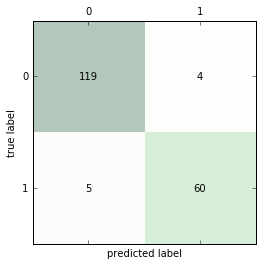

Classification Report: 
             precision    recall  f1-score   support

     Benign       0.96      0.97      0.96       123
  Malignant       0.94      0.92      0.93        65

avg / total       0.95      0.95      0.95       188



In [6]:
# DIVIDE DATASET INTO SEPARATE TRAINING DATASET - TEST SIZE SET TO 0.33 - TRAIN_TEST_SPLIT

# DIVIDE DATASET INTO SEPARATE TRAINING DATASET - TEST SIZE SET TO 0.33 - TRAIN_TEST_SPLIT

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)

lr.fit(X_train, y_train)

# print lr.score(X_test, y_test)
# MAKE A PREDICTION ON THE TEST SET AS DIRECTED
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# COMPARE THE PREDICTIONS TO THE ANSWERS TO DETERMINE THE CLASSIFICATION REPORT
print('Total Misclassified Samples (sum off-diagonals): %d' % (y_test != y_pred).sum())
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
print('Confusion Matrix for Type I and Type II Error')
plt.show()

from sklearn.metrics import classification_report
target_names = ['Benign', 'Malignant']
y_true = y_test
print('Classification Report: ')
print(classification_report(y_true, y_pred, target_names=target_names))

## 5. Scale the data and see if that improves the score.

In [7]:
# STANDARDIZE COLUMNS OF THE DATASET BEFORE FEEDING THEM TO THE LINEAR CLASSIFIER
# CREATE PIPELINE FOR TWO-STEP PROCESS

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([ ('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1)) ])
pipe_lr.fit(X_train, y_train)
print('Scaled/Standardized Improved Test Accuracy: %.4f' % pipe_lr.score(X_test, y_test))

Scaled/Standardized Improved Test Accuracy: 0.9681


## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

In [8]:
# TUNE THE MODEL USING AUTOMATED GRID SEARCH VIA 'LogisticRegressionCV' - NOTE GridSearchCV has been implemented
# below since LogisticRegressionCV has been deprecated

from sklearn.grid_search import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range}]

# USING PIPE_LR FROM ABOVE WITH SCALED/STANDARDIZED VALUES
# INSTANTIATE
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)
# PERFORM GRIDSEARCH
gs = gs.fit(X_train, y_train)
print('Grid Search Best Score: %.4f' % gs.best_score_)
print('Grid Search Best Parameter for C: ')
print gs.best_params_

Grid Search Best Score: 0.9816
Grid Search Best Parameter for C: 
{'clf__C': 0.1}


### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

### Q: What was the best C?

In [64]:
from IPython.display import display, Math, Latex
display(Math(r'J(w) =  \sum_{i=1}^n\left[ \left( -y^{(i)}*log(\phi(z^{(i)}) ) - (1-y^{(i)}) \right) * log(1 - \phi(z^{(i)})) \right] + \frac{\lambda}{2} \parallel w  \parallel ^2'))
display(Math(r' C = \frac{1}{\lambda}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>